In [44]:
# Improting all the required libraries 

from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn import tree

In [2]:
# Reading the main dataframe (credit_df) 
credit_df = pd.read_csv(Path('Resources/credit_df.csv'))

In [3]:
# Checking the first 5 rows of the data 
credit_df.head()

,monthly_revenue,loanAmt,businessHistory,industry,zipCode,hasProperty,otherLoan,cash,directorAge,taxReturn,isDefault
0,7648,25308,1,RentalHiringAndTrade,269,1,0,8344,36,12415,1
1,2155,31561,1,Construction,2920,1,0,6286,35,11258,1
2,14857,47539,1,InformationMediaAndTelecommunications,2968,0,0,7546,43,10838,1
3,12398,86986,2,Manufacturing,2920,0,0,806,59,4261,1
4,1616,96287,1,"Transport,PostalAndWarehousing",2628,0,0,4135,38,2989,1


In [4]:
# Using get_dummies function for 'industry' columns
industry_dummies = pd.get_dummies(credit_df['industry'])

In [5]:
# Adding the get_dummies dataframe to the main dataframe
credit_df = pd.concat([credit_df, industry_dummies], axis=1)


In [6]:
# Checking the shape of the main dataframe (credit_df) 
credit_df.shape

(49992, 28)

In [7]:
# Dropping the 'industry' column after using get_dummies function 
credit_df =credit_df.drop(columns=['industry'])

In [8]:
# Evaluating the 'isDefault' data to see the balance for module training 
credit_df['isDefault'].value_counts()

# Can see an unbalanced data (will need to balance it before running the module)

1    34408
0    15584
Name: isDefault, dtype: int64

In [9]:
# Assigning the X to the features of the 
X = credit_df.drop(columns=['isDefault'])
y = credit_df['isDefault']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### StandardScaler
-------

In [11]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Saving the StandardScaler to be used in the UI (streamlit) 
pickle.dump(scaler,open('Scaler.pkl','wb'))

In [13]:
# Checking the X_train dataset 
X_train

,monthly_revenue,loanAmt,businessHistory,zipCode,hasProperty,otherLoan,cash,directorAge,taxReturn,AccommodationAndFoodServices,...,InformationMediaAndTelecommunications,Manufacturing,OtherServices,ProfessionalScientificAndTechnicalServices,PublicAdministrationAndSafety,RentalHiringAndTrade,RetailTrade,ServicesSectors,"Transport,PostalAndWarehousing",WholesaleTrade
3961,194998,72469,4,4626,1,0,142616,29,8036,0,...,0,0,0,0,0,0,0,0,0,0
3954,120321,75486,6,242,1,0,89099,34,18061,1,...,0,0,0,0,0,0,0,0,0,0
31588,105441,70218,4,2980,1,1,30230,26,14156,0,...,0,0,0,0,0,0,0,0,0,0
9777,212748,38332,8,1834,1,0,63310,32,21057,0,...,0,1,0,0,0,0,0,0,0,0
35309,59189,19255,3,1018,0,1,16662,48,7312,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35822,42868,47759,2,2672,1,1,21201,26,7985,0,...,0,0,0,0,0,0,0,1,0,0
43933,31488,43094,3,924,0,1,18892,27,7252,0,...,0,0,0,0,0,0,0,1,0,0
15326,112432,7132,9,969,1,0,92196,26,22989,0,...,0,0,0,0,0,0,0,0,0,0
30756,208301,44535,9,2615,1,1,29379,29,15349,0,...,0,0,0,0,0,0,0,1,0,0


### Resampling the data 
--------

In [14]:
# Using ClusterCentroids to resample the data, given it's an unbalanced data 

In [15]:
# Import ClusterCentroids from imblearn
from imblearn.under_sampling import ClusterCentroids

# Create an instance of ClusterCentroids
cc = ClusterCentroids(random_state=1)

# Fit the cluster centroids model to the traning data
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)

## Machine leanring:
------

#### Logistic regression 

In [51]:
# assign the logistical regression module 
logistic_regression_model = LogisticRegression()

In [52]:
#  Fitting the logistic regression module on the resampled data 
lr_model = logistic_regression_model.fit(X_resampled, y_resampled)

In [53]:
# Using the fitted data to predict the testing data 
testing_predictions = lr_model.predict(X_test_scaled)

In [54]:
# Checking the predictions 
testing_predictions

array([1, 1, 0, ..., 1, 1, 1])

In [55]:
#  printing a confusion matrix for the module 
test_matrix = confusion_matrix(y_test, testing_predictions)
print(test_matrix)

[[3882    0]
 [ 313 8303]]


In [ ]:
# Printing the classification report 
testing_report = classification_report(y_test, testing_predictions)

print(testing_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3882
           1       1.00      0.96      0.98      8616

    accuracy                           0.97     12498
   macro avg       0.96      0.98      0.97     12498
weighted avg       0.98      0.97      0.98     12498



In [58]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, testing_predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

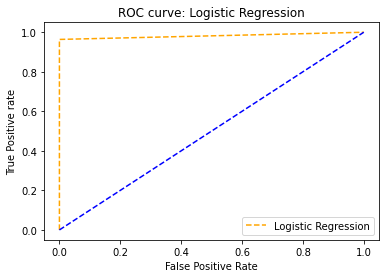

In [61]:
# plot roc curves
fig_1 = plt.figure()
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve: Logistic Regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [289]:
# Saving the trained module to be used in the UI (streamlit) 
pickle.dump(lr_model,open('model_lr.pkl','wb'))

#### RandomForest model:

In [63]:
# Assining a variabl to the RandomForestClassifier 

rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

In [64]:
# Fitting the module on the data 
rd_model = rf_model.fit(X_resampled, y_resampled)

In [65]:
# Predicting 
predictions = rf_model.predict(X_test_scaled)

In [66]:
# Checking the accuracy score 
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9958393342934869

In [67]:
predictions

array([1, 1, 0, ..., 1, 1, 1])

In [68]:
# Printing the classification reprot to assess the our recall and precision 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3882
           1       1.00      0.99      1.00      8616

    accuracy                           1.00     12498
   macro avg       0.99      1.00      1.00     12498
weighted avg       1.00      1.00      1.00     12498



In [30]:
# Checking the improtance and weight of each feature in the randomeForest module
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.25942240074071304, 'cash'),
 (0.20242812384045236, 'monthly_revenue'),
 (0.18154100688203623, 'businessHistory'),
 (0.16363215322407632, 'taxReturn'),
 (0.1099769156223369, 'otherLoan'),
 (0.02958923829058078, 'directorAge'),
 (0.02325541698676651, 'hasProperty'),
 (0.0036723111442686983, 'loanAmt'),
 (0.003067077333694344, 'zipCode'),
 (0.0029669112712162487, 'ElectricityGasWaterAndWasteServices'),
 (0.0028916112853379565, 'RentalHiringAndTrade'),
 (0.002723935734512894, 'Transport,PostalAndWarehousing'),
 (0.002407442643617758, 'InformationMediaAndTelecommunications'),
 (0.0019466610916629656, 'WholesaleTrade'),
 (0.0018147871126196614, 'ProfessionalScientificAndTechnicalServices'),
 (0.0017913899077669796, 'ArtsAndRecreation'),
 (0.0017884706585395188, 'AgricultureForestryAndFishing'),
 (0.0015296631626811265, 'PublicAdministrationAndSafety'),
 (0.0015046455655780765, 'Manufacturing'),
 (0.0003806554206182716, 'AccommodationAndFoodServices'),
 (0.00036435148814918704, 'RetailTra

In [69]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

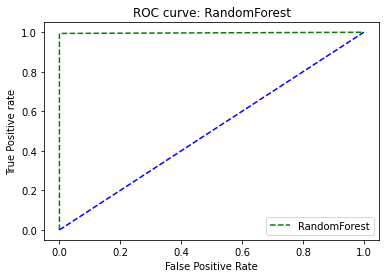

In [70]:
# plot roc curves
fig_2 = plt.figure()
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve: RandomForest')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [31]:
# Saving the pre run module to be used in the streamlit 
pickle.dump(rd_model,open('model_rd.pkl','wb'))

### Decision Tree model:

In [86]:
# Assinging the model
model_dt = tree.DecisionTreeClassifier()

In [87]:
# Fitting the model 
model_dt = model_dt.fit(X_resampled, y_resampled)

In [88]:
# Predicting the model 
pred = model_dt.predict(X_test_scaled)

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3882
           1       1.00      0.99      1.00      8616

    accuracy                           0.99     12498
   macro avg       0.99      0.99      0.99     12498
weighted avg       0.99      0.99      0.99     12498



In [90]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

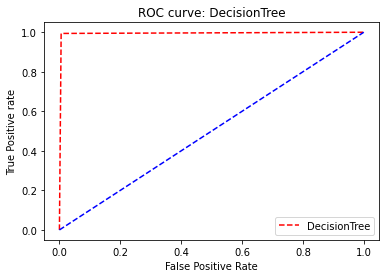

In [91]:
# plot roc curves
fig_3 = plt.figure()
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='DecisionTree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve: DecisionTree')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [92]:
# Saving the pre run module to be used in the streamlit 
pickle.dump(model_dt,open('model_dt.pkl','wb'))

#### Neural Network (Deep Learning): 

In [75]:
# Importing the required libraries from tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [19]:
# Building the neural network structure 
# Assigning the numbers of input, and two hidden layers 

number_inputs = 26
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 12

# Assign a varliable to the model 
nn = Sequential()

# Building the struture of the first hidden layer 
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_inputs, activation="relu"))

# Building the struture of the second hidden layer, using 'relu' as activation  
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Building the output layer, using 'sigmoid' as activation 
nn.add(Dense(1, activation="sigmoid"))

2022-09-03 19:36:35.110307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Checking the summary 
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the Sequential model, with claculating details for the 
# classification report 
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [24]:
# Fitting the model, with specific batch size and epochs 
batch_size = 1000
epochs = 40
model = nn.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/40
38/38 [==============================] - 1s 2ms/step - loss: 1816.1165 - accuracy: 0.6293 - tp: 20775.0000 - tn: 2820.0000 - fp: 8882.0000 - fn: 5017.0000 - precision: 0.7005 - recall: 0.8055 - auc: 0.5234
Epoch 2/40
38/38 [==============================] - 0s 2ms/step - loss: 176.4583 - accuracy: 0.8164 - tp: 22866.0000 - tn: 7744.0000 - fp: 3958.0000 - fn: 2926.0000 - precision: 0.8524 - recall: 0.8866 - auc: 0.7751
Epoch 3/40
38/38 [==============================] - 0s 2ms/step - loss: 94.8863 - accuracy: 0.8223 - tp: 22984.0000 - tn: 7847.0000 - fp: 3855.0000 - fn: 2808.0000 - precision: 0.8564 - recall: 0.8911 - auc: 0.7821
Epoch 4/40
38/38 [==============================] - 0s 2ms/step - loss: 64.5863 - accuracy: 0.8262 - tp: 22968.0000 - tn: 8009.0000 - fp: 3693.0000 - fn: 2824.0000 - precision: 0.8615 - recall: 0.8905 - auc: 0.7891
Epoch 5/40
38/38 [==============================] - 0s 2ms/step - loss: 53.5834 - accuracy: 0.8170 - tp: 22838.0000 - tn: 7795.0000 - fp:

In [ ]:
# Calculating the auc metrics and ploting the roc_curve 

In [25]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [27]:
# Making predictions to feed the roc_curve module
train_predictions = nn.predict(X_train, batch_size=1000)
test_predictions = nn.predict(X_test, batch_size=1000)

13/13 [==============================] - 0s 833us/step


In [28]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

In [29]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=0.8702)'}, xlabel='FPR Test'>

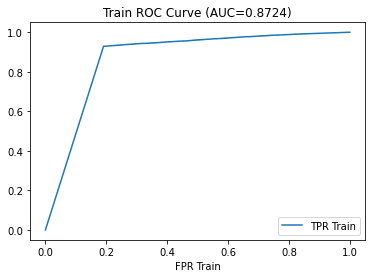

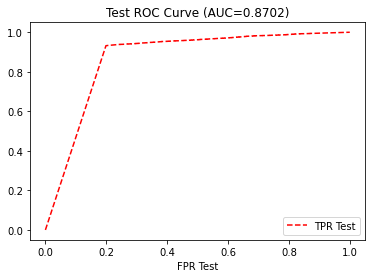

In [30]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

In [33]:
# Evaluate the model
scores = nn.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(nn.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 6.454841136932373,
 'accuracy': 0.8664586544036865,
 'tp': 8128.0,
 'tn': 2701.0,
 'fp': 1181.0,
 'fn': 488.0,
 'precision': 0.8731335401535034,
 'recall': 0.9433611631393433,
 'auc': 0.8345995545387268}

In [34]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=8128.0,FN=1181.0
Negative(0),FP=488.0,TN=2701.0


In [36]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = (nn.predict(X_test) > 0.5).astype("int32")

# Display classification report
print(classification_report(y_predict_classes, y_test))

391/391 [==============================] - 0s 722us/step
              precision    recall  f1-score   support

           0       0.70      0.85      0.76      3189
           1       0.94      0.87      0.91      9309

    accuracy                           0.87     12498
   macro avg       0.82      0.86      0.84     12498
weighted avg       0.88      0.87      0.87     12498

